In [190]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [191]:
df=pd.read_csv('fcc-forum-pageviews.csv')

In [192]:
df['date'] = pd.to_datetime(df['date'])

In [193]:
df.set_index('date', inplace=True)

In [194]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [195]:
df.quantile(1-0.025)[0]

df=df[(df['value']>df.quantile(0.025)[0]) & (df['value']<df.quantile(1-0.025)[0])]

In [196]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


<AxesSubplot:title={'center':'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

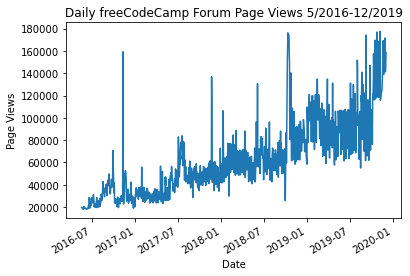

In [197]:
df.plot(y='value',use_index=True,legend=False,xlabel='Date',ylabel='Page Views',title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019")


In [198]:
df1=df

In [199]:
df1['date']= df1.index

In [200]:
df1['year']= df1['date'].dt.year

In [201]:
mask={1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
df1['month']= df1['date'].dt.month.map(mask)


In [202]:
#df1.drop(['day'],axis=1)
df1

,value,date,year,month
date,,,,
2016-05-19,19736,2016-05-19,2016,May
2016-05-26,18060,2016-05-26,2016,May
2016-05-27,19997,2016-05-27,2016,May
2016-05-28,19044,2016-05-28,2016,May
2016-05-29,20325,2016-05-29,2016,May
...,...,...,...,...
2019-11-24,138875,2019-11-24,2019,November
2019-11-29,171584,2019-11-29,2019,November
2019-11-30,141161,2019-11-30,2019,November


In [203]:
df2016 = df1[df['year']==2016]

In [204]:
df2016.groupby(['month']).mean()

,value,year
month,,
August,31049.193548,2016.0
December,27832.419355,2016.0
July,24109.678571,2016.0
June,21875.105263,2016.0
May,19432.400000,2016.0
November,40448.633333,2016.0
October,27398.322581,2016.0
September,41476.866667,2016.0


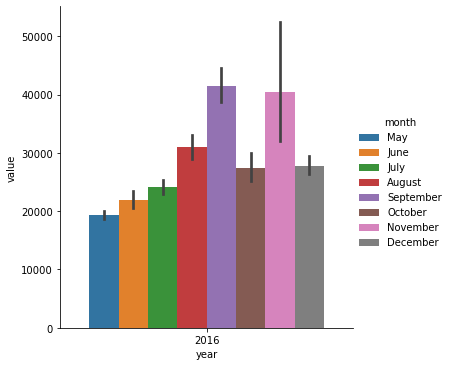

In [205]:
graph = sns.catplot(x="year", y="value", data=df2016,kind="bar",hue='month',legend=True)

In [206]:
df2016 = df1[df['year']==2016]
df2017 = df1[df['year']==2017]
df2018 = df1[df['year']==2018]
df2019 = df1[df['year']==2019]

In [207]:
df2016=df2016.groupby(['month']).mean()
df2016=df2016.astype({'year': 'int32'})


In [208]:
df2017=df2017.groupby(['month']).mean()
df2017=df2017.astype({'year': 'int32'})


In [209]:
df2018=df2018.groupby(['month']).mean()
df2018=df2018.astype({'year': 'int32'})

In [210]:
df2019=df2019.groupby(['month']).mean()
df2019=df2019.astype({'year': 'int32'})

In [211]:
frames = [df2016, df2017, df2018,df2019]

In [212]:
result = pd.concat(frames)

In [213]:
#import numpy as np
#a=np.array(result.index)
#mask={1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

In [214]:
result['months']=result.index

In [215]:
result['months'] = pd.Categorical(result['months'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

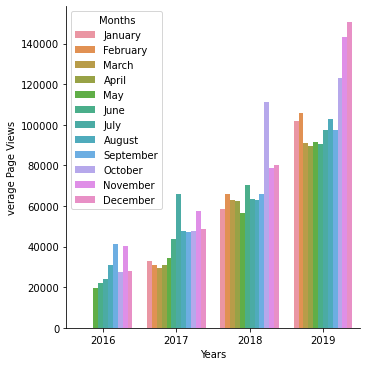

In [216]:
graph = sns.catplot(x="year", y="value", data=result,kind="bar",hue='months',legend=True,legend_out=False)
graph.set(xlabel="Years", ylabel = "verage Page Views")
plt.legend(title='Months')

In [217]:
df1


,value,date,year,month
date,,,,
2016-05-19,19736,2016-05-19,2016,May
2016-05-26,18060,2016-05-26,2016,May
2016-05-27,19997,2016-05-27,2016,May
2016-05-28,19044,2016-05-28,2016,May
2016-05-29,20325,2016-05-29,2016,May
...,...,...,...,...
2019-11-24,138875,2019-11-24,2019,November
2019-11-29,171584,2019-11-29,2019,November
2019-11-30,141161,2019-11-30,2019,November


In [218]:
df

,value,date,year,month
date,,,,
2016-05-19,19736,2016-05-19,2016,May
2016-05-26,18060,2016-05-26,2016,May
2016-05-27,19997,2016-05-27,2016,May
2016-05-28,19044,2016-05-28,2016,May
2016-05-29,20325,2016-05-29,2016,May
...,...,...,...,...
2019-11-24,138875,2019-11-24,2019,November
2019-11-29,171584,2019-11-29,2019,November
2019-11-30,141161,2019-11-30,2019,November
